# Comparación iespnet contra dsf-iespnet

In [1]:
import sys
import os

import pandas   as pd
import numpy    as np
import seaborn  as sns

import matplotlib.pyplot        as plt
import matplotlib.font_manager  as fm

from matplotlib.lines     import Line2D
from utilit_espectrograms import get_bool_mask_stim_artifact
from matplotlib.backends.backend_pdf import PdfPages

sys.path.append(os.path.abspath(os.path.join('..','..','iESPnet_SRC_main','utilities')))
from Generator         import SeizureDatasetLabelTimev2, smoothing_label
from Model             import iESPnet
from TrainEval         import test_model_dsf_iespnet, get_performance_indices

sys.path.append(os.path.abspath(os.path.join('../../..','03 Dynamic-Spatial-Filtering')))
from models            import DynamicSpatialFilter

# Visualización por epoca 

In [2]:
spe_dir_dsf_iespnet = '/media/martin/Disco2/Rns_Data/PITT_PI_EEG/'
spe_dir_iespnet = '/media/martin/Disco2/Rns_Data/PITT_PI_SPEC/'

In [3]:
meta_data_dsf_iespnet = '/media/martin/Disco2/Rns_Data/PITT_PI_EEG/METADATA/allfiles_metadata.csv' 
meta_data_iespnet     = '/media/martin/Disco2/Rns_Data/PITT_PI_SPEC/METADATA/allfiles_metadata.csv'

df_meta_dsf_iespnet   = pd.read_csv(meta_data_dsf_iespnet)
df_meta_iespnet       = pd.read_csv(meta_data_iespnet)

In [4]:
patients_dsf_iespnet  = df_meta_dsf_iespnet['rns_id'].unique().tolist()
save_path_dsf_iespnet = '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo'

patients_iespnet      = df_meta_iespnet['rns_id'].unique().tolist()
save_path_iespnet     = '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo'

In [5]:
print(patients_dsf_iespnet)
print(patients_iespnet)

['PIT-RNS1603', 'PIT-RNS6989', 'PIT-RNS3016', 'PIT-RNS1529', 'PIT-RNS7168', 'PIT-RNS4098', 'PIT-RNS1836', 'PIT-RNS9183', 'PIT-RNS1440', 'PIT-RNS1713', 'PIT-RNS9536', 'PIT-RNS2543', 'PIT-RNS1438', 'PIT-RNS1534', 'PIT-RNS1703', 'PIT-RNS1556', 'PIT-RNS1597', 'PIT-RNS6992', 'PIT-RNS8326', 'PIT-RNS2227', 'PIT-RNS8163', 'PIT-RNS8973', 'PIT-RNS6806', 'PIT-RNS1090', 'PIT-RNS2368', 'PIT-RNS6762', 'PIT-RNS2938', 'PIT-RNS7525', 'PIT-RNS0427', 'PIT-RNS8076']
['PIT-RNS1603', 'PIT-RNS6989', 'PIT-RNS3016', 'PIT-RNS1529', 'PIT-RNS7168', 'PIT-RNS4098', 'PIT-RNS1836', 'PIT-RNS9183', 'PIT-RNS1440', 'PIT-RNS1713', 'PIT-RNS9536', 'PIT-RNS2543', 'PIT-RNS1438', 'PIT-RNS1534', 'PIT-RNS1703', 'PIT-RNS1556', 'PIT-RNS1597', 'PIT-RNS6992', 'PIT-RNS8326', 'PIT-RNS2227', 'PIT-RNS8163', 'PIT-RNS8973', 'PIT-RNS6806', 'PIT-RNS1090', 'PIT-RNS2368', 'PIT-RNS6762', 'PIT-RNS2938', 'PIT-RNS7525', 'PIT-RNS0427', 'PIT-RNS8076']


In [6]:
# save results

save_results_dsf_iespnet         = []
for s in range(len(patients_dsf_iespnet)):
    # define test de df_meta
    test_df  = df_meta_dsf_iespnet[df_meta_dsf_iespnet['rns_id'] == patients_dsf_iespnet[s]].copy()      
    test_df.reset_index(drop = True, inplace=True)

    test_epochs = test_df['data'].apply(lambda x: x.split("_")[2]).unique()

    save_results_dsf_iespnet_patient = []
    for epoch_counter in test_epochs:
        save_results_dsf_iespnet_patient.append(save_path_dsf_iespnet + '/' + patients_dsf_iespnet[s] + '/results/' + str(epoch_counter) +'_results.npy')

    save_results_dsf_iespnet.append(save_results_dsf_iespnet_patient)
print(save_results_dsf_iespnet)

[['/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20150804-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20150909-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20151021-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20151118-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20151215-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20160120-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20161012-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20161215-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/dsf_iespnet_lopo/PIT-RNS1603/results/20161215-2_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/

In [7]:
# save results

save_results_iespnet = []
for s in range(len(patients_iespnet)):
    # define test de df_meta
    test_df  = df_meta_iespnet[df_meta_iespnet['rns_id'] == patients_iespnet[s]].copy()      
    test_df.reset_index(drop = True, inplace=True)

    test_epochs = test_df['data'].apply(lambda x: x.split("_")[2]).unique()

    save_results_iespnet_patient = []
    for epoch_counter in test_epochs:
        save_results_iespnet_patient.append(save_path_iespnet + '/' + patients_iespnet[s] + '/results/' + str(epoch_counter) +'_results.npy')

    save_results_iespnet.append(save_results_iespnet_patient)
print(save_results_iespnet)

[['/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20150804-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20150909-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20151021-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20151118-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20151215-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20160120-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20161012-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20161215-1_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/20161215-2_results.npy', '/media/martin/Disco2/Rns_Data/experimentos/iespnet_lopo/PIT-RNS1603/results/201

In [8]:
results_dsf_iespnet = []
for s in range(len(save_results_dsf_iespnet)):
    results_dsf_iespnet_patient = []
    for j in range (len(save_results_dsf_iespnet[s])):
        results_dsf_iespnet_patient.append(np.load(save_results_dsf_iespnet[s][j],allow_pickle=True).item())
    
    results_dsf_iespnet.append(results_dsf_iespnet_patient)

In [9]:
results_iespnet = []
for s in range(len(save_results_iespnet)):
    results_iespnet_patient = []
    for j in range (len(save_results_iespnet[s])):
        results_iespnet_patient.append(np.load(save_results_iespnet[s][j],allow_pickle=True).item())
    
    results_iespnet.append(results_iespnet_patient)

In [10]:
print(results_dsf_iespnet[0][0].keys())
print(results_iespnet[0][0].keys())

dict_keys(['prediction_te', 'prom_stim_time', 'stim_time'])
dict_keys(['prediction_te'])


In [11]:
prediction_te_dsf_iespnet = []
for s in range (len(results_dsf_iespnet)):
    prediction_te_dsf_iespnet_patient = []
    for j in range (len(results_dsf_iespnet[s])):
        prediction_te_dsf_iespnet_patient.append(results_dsf_iespnet[s][j].get('prediction_te'))

    prediction_te_dsf_iespnet.append(prediction_te_dsf_iespnet_patient)   

In [13]:
prediction_te_iespnet = []
for s in range (len(results_iespnet)):
    prediction_te_iespnet_patient = []
    for j in range (len(results_iespnet[s])):
        prediction_te_iespnet_patient.append(results_iespnet[s][j].get('prediction_te'))

    prediction_te_iespnet.append(prediction_te_iespnet_patient)  

In [14]:
print(prediction_te_dsf_iespnet[0][0].keys())
print(prediction_te_iespnet[0][0].keys())

dict_keys(['accuracy', 'f1', 'precision', 'recall', 'y_true', 'y_pred', 't_true', 't_pred', 'l_true', 'l_pred', 'proba', 'MAE_time'])
dict_keys(['accuracy', 'f1', 'precision', 'recall', 'y_true', 'y_pred', 't_true', 't_pred', 'l_true', 'l_pred', 'proba', 'MAE_time'])


In [15]:
accuracy_dsf_iespnet = []
for s in range (len(prediction_te_dsf_iespnet)):
    accuracy_dsf_iespnet_patient = []
    for j in range (len(prediction_te_dsf_iespnet[s])):
        accuracy_dsf_iespnet_patient.append(float(prediction_te_dsf_iespnet[s][j].get('accuracy')))
    accuracy_dsf_iespnet.append(accuracy_dsf_iespnet_patient)

f1_dsf_iespnet = []
for s in range (len(prediction_te_dsf_iespnet)):
    f1_dsf_iespnet_patient = []
    for j in range (len(prediction_te_dsf_iespnet[s])):
        f1_dsf_iespnet_patient.append(float(prediction_te_dsf_iespnet[s][j].get('f1')))
    f1_dsf_iespnet.append(f1_dsf_iespnet_patient)

MAE_dsf_iespnet = []
for s in range (len(prediction_te_dsf_iespnet)):
    MAE_dsf_iespnet_patient = []
    for j in range (len(prediction_te_dsf_iespnet[s])):
        MAE_dsf_iespnet_patient.append(prediction_te_dsf_iespnet[s][j].get('MAE_time'))
    MAE_dsf_iespnet.append(MAE_dsf_iespnet_patient)      

In [16]:
accuracy_iespnet = []
for s in range (len(prediction_te_iespnet)):
    accuracy_iespnet_patient = []
    for j in range (len(prediction_te_iespnet[s])):
        accuracy_iespnet_patient.append(float(prediction_te_iespnet[s][j].get('accuracy')))
    accuracy_iespnet.append(accuracy_iespnet_patient)

f1_iespnet = []
for s in range (len(prediction_te_iespnet)):
    f1_iespnet_patient = []
    for j in range (len(prediction_te_iespnet[s])):
        f1_iespnet_patient.append(float(prediction_te_iespnet[s][j].get('f1')))
    f1_iespnet.append(f1_iespnet_patient)

MAE_iespnet = []
for s in range (len(prediction_te_iespnet)):
    MAE_iespnet_patient = []
    for j in range (len(prediction_te_iespnet[s])):
        MAE_iespnet_patient.append(prediction_te_iespnet[s][j].get('MAE_time'))
    MAE_iespnet.append(MAE_iespnet_patient)    

In [24]:
listas = np.load('data_lists.npy',allow_pickle=True).item()
listas.keys()

dict_keys(['short_file_per_epoch_per_patient', 'time_stim_per_epoch_per_patient', 'time_to_pad_per_epoch_per_patient', 'patients_list'])

In [25]:
time_stim_per_epoch_per_patient = listas.get('time_stim_per_epoch_per_patient')
len(time_stim_per_epoch_per_patient)

30

In [27]:
time_stim_per_epoch_per_patient[0]

[np.float64(nan),
 np.float64(nan),
 np.float64(2.349106666286929),
 np.float64(2.369909912402412),
 np.float64(2.3784778273241116),
 np.float64(3.6330045686665824),
 np.float64(3.9949546709656087),
 np.float64(4.284369659124518),
 np.float64(4.2147738504501895),
 np.float64(4.278523510101011),
 np.float64(3.7478768651696366),
 np.float64(3.8899894197775184),
 np.float64(4.1817264834926124),
 np.float64(4.057164710289711)]

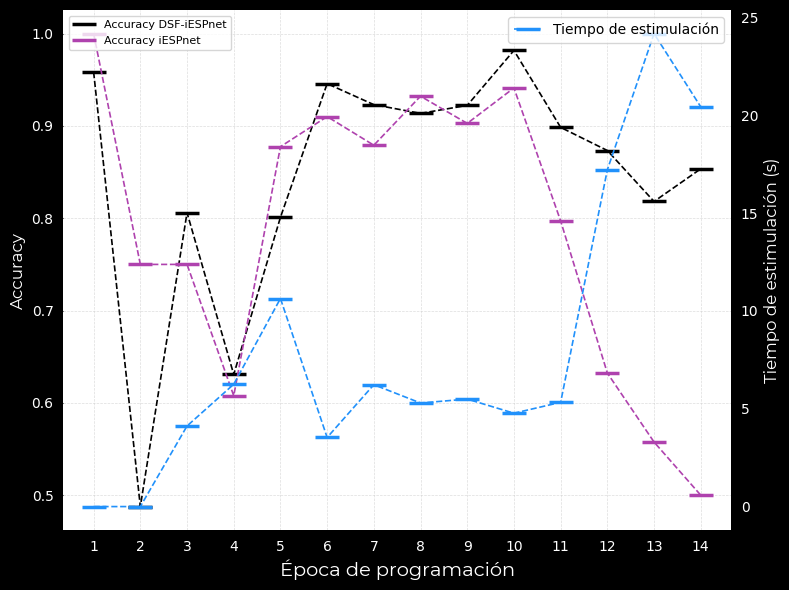

In [91]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# Cargar la fuente Montserrat
font_path = '../03-Letra-plot/Montserrat-Regular.ttf'
montserrat = fm.FontProperties(fname=font_path)

# Datos de ejemplo
epochs = list(range(1, len(accuracy_dsf_iespnet[0]) + 1))

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(8, 6), facecolor='#000000')

# Ajustar espacio entre los ejes y los márgenes
plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.1)

# Eje 1 (para la precisión del modelo)
ax1.set_xlabel('Época de programación', color='#FFFFFF', fontproperties=montserrat, fontsize=14)
ax1.set_ylabel('Accuracy', color='#FFFFFF', fontproperties=montserrat, fontsize=12)

# Añadir líneas con estilo punteado y marcadores personalizados
ax1.plot(epochs, accuracy_dsf_iespnet[0], color='#000000', linestyle='--', linewidth=1.2, label='Accuracy DSF-iESPnet', marker='_', markersize=17, markeredgewidth=2.5)
ax1.plot(epochs, accuracy_iespnet[0], color='#AF42AE', linestyle='--', linewidth=1.2, label='Accuracy iESPnet', marker='_', markersize=17, markeredgewidth=2.5)

ax1.tick_params(axis='y', labelcolor='#FFFFFF')
ax1.tick_params(axis='x', labelcolor='#FFFFFF',labelsize=10)


# Leyenda para el eje 1
ax1.legend(loc='upper left', fontsize=8)

ax1.set_xticks(epochs)

# Eje 2 (para el tiempo de estimulación)
ax2 = ax1.twinx()  # Crear un segundo eje que comparte el mismo eje x
ax2.set_ylabel('Tiempo de estimulación (s)', color='#FFFFFF', fontproperties=montserrat, fontsize=12)

# Añadir línea con estilo punteado y marcador personalizado
ax2.plot(epochs, stim_time_dsf_iespnet[0], color='#2191FB', linestyle='--', linewidth=1.2, label='Tiempo de estimulación', marker='_', markersize=17, markeredgewidth=2.5)
ax2.tick_params(axis='y', labelcolor='#FFFFFF')

# Leyenda para el eje 2
ax2.legend(loc='upper right', fontsize=10)

# Estilos de cuadrícula y líneas de los ejes
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='#CFCFCF')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Ajustar el diseño para evitar superposiciones
fig.tight_layout()

# Mostrar la figura
plt.show()

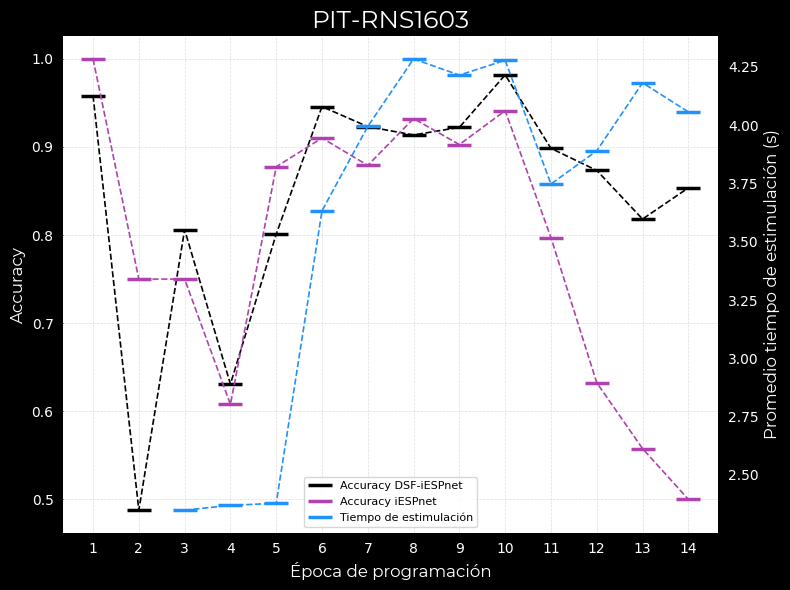

In [28]:
# Cargar la fuente Montserrat
font_path = '../03-Letra-plot/Montserrat-Regular.ttf'
montserrat = fm.FontProperties(fname=font_path)

# Datos de ejemplo
epochs = list(range(1, len(accuracy_dsf_iespnet[0]) + 1))

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(8, 6), facecolor='#000000')

# Ajustar espacio entre los ejes y los márgenes
plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.1)

ax1.set_title(f'{patients_dsf_iespnet[s]}', fontproperties=montserrat, fontsize=18, color='#FFFFFF')

# Eje 1 (para la precisión del modelo)
ax1.set_xlabel('Época de programación', color='#FFFFFF', fontproperties=montserrat, fontsize=12)
ax1.set_ylabel('Accuracy', color='#FFFFFF', fontproperties=montserrat, fontsize=12)

# Añadir líneas con estilo punteado y marcadores personalizados
line1, = ax1.plot(epochs, accuracy_dsf_iespnet[0], color='#000000', linestyle='--', linewidth=1.2, label='Accuracy DSF-iESPnet', marker='_', markersize=17, markeredgewidth=2.5)
line2, = ax1.plot(epochs, accuracy_iespnet[0], color='#AF42AE', linestyle='--', linewidth=1.2, label='Accuracy iESPnet', marker='_', markersize=17, markeredgewidth=2.5)

ax1.tick_params(axis='y', labelcolor='#FFFFFF')
ax1.tick_params(axis='x', labelcolor='#FFFFFF', labelsize=10)

# Eje 2 (para el tiempo de estimulación)
ax2 = ax1.twinx()  # Crear un segundo eje que comparte el mismo eje x
ax2.set_ylabel('Promedio tiempo de estimulación (s)', color='#FFFFFF', fontproperties=montserrat, fontsize=12)

# Añadir línea con estilo punteado y marcador personalizado
line3, = ax2.plot(epochs, time_stim_per_epoch_per_patient[0], color='#2191FB', linestyle='--', linewidth=1.2, label='Tiempo de estimulación', marker='_', markersize=17, markeredgewidth=2.5)
ax2.tick_params(axis='y', labelcolor='#FFFFFF')

# Crear una leyenda única combinando las líneas de ambos ejes
handles = [line1, line2, line3]
labels = [line.get_label() for line in handles]
ax1.legend(handles, labels, loc='lower center', fontsize=8)

# Establecer los ticks en el eje x
ax1.set_xticks(epochs)

# Estilos de cuadrícula y líneas de los ejes
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='#CFCFCF')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Ajustar el diseño para evitar superposiciones
fig.tight_layout()

# Mostrar la figura
plt.show()


In [29]:
# Crear un PDF para guardar los gráficos
with PdfPages('graficos_pacientes.pdf') as pdf:
    for s in range(len(patients_dsf_iespnet)):
        # Datos de ejemplo
        epochs = list(range(1, len(accuracy_dsf_iespnet[s]) + 1))

        # Reemplazar NaN por 0 en las listas
        accuracy_dsf_iespnet[s] = np.nan_to_num(accuracy_dsf_iespnet[s], nan=0.0)
        accuracy_iespnet[s] = np.nan_to_num(accuracy_iespnet[s], nan=0.0)
        time_stim_per_epoch_per_patient[s] = np.nan_to_num(time_stim_per_epoch_per_patient[s], nan=0.0)


        # Crear la figura y los ejes
        fig, ax1 = plt.subplots(figsize=(8, 6), facecolor='#000000')

        # Ajustar espacio entre los ejes y los márgenes
        plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.1)

        ax1.set_title(f'{patients_dsf_iespnet[s]}', fontproperties=montserrat, fontsize=18, color='#FFFFFF')

        # Eje 1 (para la precisión del modelo)
        ax1.set_xlabel('Época de programación', color='#FFFFFF', fontproperties=montserrat, fontsize=12)
        ax1.set_ylabel('Accuracy', color='#FFFFFF', fontproperties=montserrat, fontsize=12, labelpad=15)

        # Añadir líneas con estilo punteado y marcadores personalizados
        line1, = ax1.plot(epochs, accuracy_dsf_iespnet[s], color='#000000', linestyle='--', linewidth=1.2, label='Accuracy DSF-iESPnet', marker='_', markersize=17, markeredgewidth=2.5)
        line2, = ax1.plot(epochs, accuracy_iespnet[s], color='#AF42AE', linestyle='--', linewidth=1.2, label='Accuracy iESPnet', marker='_', markersize=17, markeredgewidth=2.5)

        ax1.tick_params(axis='y', labelcolor='#FFFFFF')
        ax1.tick_params(axis='x', labelcolor='#FFFFFF', labelsize=10)
        
        # Mantener los límites del eje y de accuracy
        ax1.set_ylim(0, 1.1)  # Límite desde 0 para que coincida
        ax1.set_yticks(np.arange(0, 1.1, 0.1))

        # Eje 2 (para el tiempo de estimulación)
        ax2 = ax1.twinx()  # Crear un segundo eje que comparte el mismo eje x
        ax2.set_ylabel('Longitud de estimulación (s)', color='#FFFFFF', fontproperties=montserrat, fontsize=12, labelpad=15)

        # Añadir línea con estilo punteado y marcador personalizado
        line3, = ax2.plot(epochs, time_stim_per_epoch_per_patient[s], color='#2191FB', linestyle='--', linewidth=1.2, label='Tiempo de estimulación', marker='_', markersize=17, markeredgewidth=2.5)
        ax2.tick_params(axis='y', labelcolor='#FFFFFF')

        # Establecer los límites del eje de estimulación desde 0 a 50
        ax2.set_ylim(0, 15)
        ax2.set_yticks(np.arange(0, 16, 1))  # Ticks de 5 en 5

        # Crear una leyenda única combinando las líneas de ambos ejes
        handles = [line1, line2, line3]
        labels = [line.get_label() for line in handles]
        ax1.legend(handles, labels, loc='upper center', fontsize=7, ncol=3)

        # Establecer los ticks en el eje x
        ax1.set_xticks(epochs)

        # Estilos de cuadrícula y líneas de los ejes
        ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='#CFCFCF')
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)

        ax2.spines['top'].set_visible(False)
        ax2.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.spines['bottom'].set_visible(False)

        # Ajustar el diseño para evitar superposiciones
        fig.tight_layout()

        # Guardar la figura en el PDF
        pdf.savefig(fig)
        plt.close(fig)  # Cerrar la figura para liberar memoria

# PDF creado con los gráficos


# Continuacion

In [ ]:
plt.plot()

In [15]:
print(
      patients_lopo.index('PIT-RNS0427'),
      patients_lopo.index('PIT-RNS1713'),  
      patients_lopo.index('PIT-RNS3016'),
      patients_lopo.index('PIT-RNS7168'),
      patients_lopo.index('PIT-RNS8326'),
      patients_lopo.index('PIT-RNS6762'),
     )

28 9 2 4 18 25


In [16]:
df_f1 = pd.DataFrame({'patients': patients_lopo,'iespnet': f1_iespnet, 'dsf-iespnet': f1_lopo})
df_f1

,patients,iespnet,dsf-iespnet
0,PIT-RNS1603,0.806252,0.861750
1,PIT-RNS6989,0.870045,0.754196
2,PIT-RNS3016,0.659410,0.633697
3,PIT-RNS1529,0.932166,0.932666
4,PIT-RNS7168,0.618873,0.621749
5,PIT-RNS4098,0.427625,0.567006
6,PIT-RNS1836,0.650445,0.652691
7,PIT-RNS9183,0.914993,0.865811
8,PIT-RNS1440,0.979601,0.973717
9,PIT-RNS1713,0.730827,0.688193


In [17]:
df_accuracy = pd.DataFrame({'patients': patients_lopo,'iespnet': accuracy_iespnet, 'dsf-iespnet': accuracy_lopo})
df_accuracy

,patients,iespnet,dsf-iespnet
0,PIT-RNS1603,0.792820,0.896475
1,PIT-RNS6989,0.947025,0.946566
2,PIT-RNS3016,0.671971,0.721185
3,PIT-RNS1529,0.925572,0.932892
4,PIT-RNS7168,0.583405,0.602365
5,PIT-RNS4098,0.482630,0.534363
6,PIT-RNS1836,0.627044,0.626897
7,PIT-RNS9183,0.913064,0.888127
8,PIT-RNS1440,0.973997,0.984518
9,PIT-RNS1713,0.707875,0.650266


In [18]:
df_MAE = pd.DataFrame({'patients': patients_lopo,'iespnet': MAE_time_iespnet, 'dsf-iespnet': MAE_time_lopo})
df_MAE

,patients,iespnet,dsf-iespnet
0,PIT-RNS1603,5.002703,6.986166
1,PIT-RNS6989,1.634146,3.761364
2,PIT-RNS3016,3.382353,4.580000
3,PIT-RNS1529,5.163660,6.334577
4,PIT-RNS7168,7.914286,10.053191
5,PIT-RNS4098,4.686047,3.626016
6,PIT-RNS1836,8.745726,5.759341
7,PIT-RNS9183,1.909524,3.809735
8,PIT-RNS1440,0.707237,0.864780
9,PIT-RNS1713,0.947368,0.821429


## Boxplot

/tmp/ipykernel_430625/466174654.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontproperties = montserrat, fontsize = 14)
/tmp/ipykernel_430625/466174654.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontproperties = montserrat, fontsize = 14)


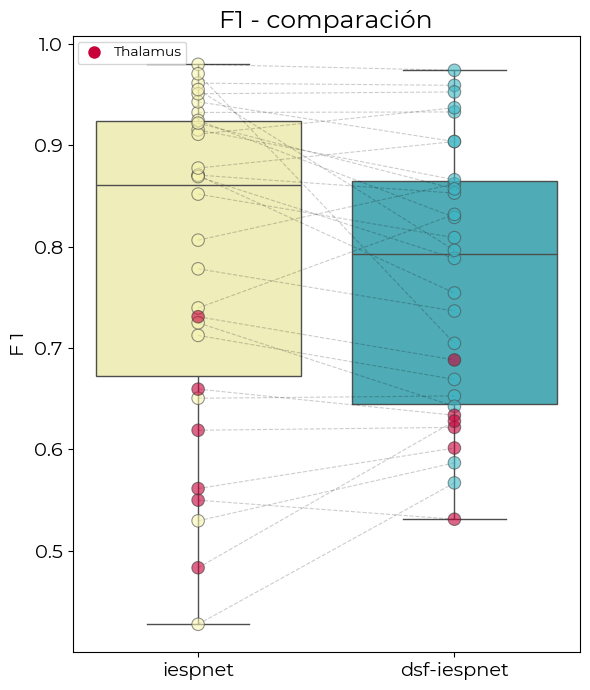

In [19]:
df = pd.DataFrame({'iespnet': f1_iespnet, 'dsf-iespnet': f1_lopo})

font_path        = '../03-Letra-plot/Montserrat-Regular.ttf'
montserrat       = fm.FontProperties(fname = font_path)

indices_thalamus = [2, 4, 9, 18, 25, 28]
thalamus_data    = df.loc[indices_thalamus]  

plt.figure(figsize = (6, 7), facecolor='white')

# Configurar colores personalizados para la cuadrícula
plt.rc('grid',   color='#CFCFCF', linestyle='--', linewidth=0.7)
plt.rc('axes',   facecolor='white')

# Crea el box plot
sns.boxplot(data = df, palette = ["#F8F5B1", "#3EB8C6"])
sns.stripplot(data = df.drop(indices_thalamus), size=9, jitter = False, linewidth = 0.8, alpha = 0.6, palette = ['#F8F5B1', '#3EB8C6'])
sns.stripplot(data = thalamus_data, size = 9, jitter = False, linewidth = 0.8, alpha = 0.6, palette = ['#C70039', '#C70039'])

#leyenda
thalamus_legend = Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = '#C70039', markersize = 10, label = "Thalamus")
legend=plt.legend(handles = [thalamus_legend], loc = 'upper left', prop = {'size': 8})
for text in legend.get_texts():
    text.set_fontproperties(montserrat)


for i in range(len(f1_lopo)):
    plt.plot([0, 1], [f1_iespnet[i], f1_lopo[i]], linestyle='--', linewidth=0.8, alpha=0.2, color='black')

plt.title('F1 - comparación', fontproperties = montserrat, fontsize = 18, color = 'black')
plt.ylabel('F 1', fontproperties = montserrat, fontsize = 14,color = 'black')


# Aplicar la fuente Montserrat a las etiquetas de los ejes
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), fontproperties = montserrat, fontsize = 14)
ax.set_yticklabels(ax.get_yticklabels(), fontproperties = montserrat, fontsize = 14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

/tmp/ipykernel_430625/2290172206.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontproperties=montserrat, fontsize=14)
/tmp/ipykernel_430625/2290172206.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontproperties=montserrat, fontsize=14)


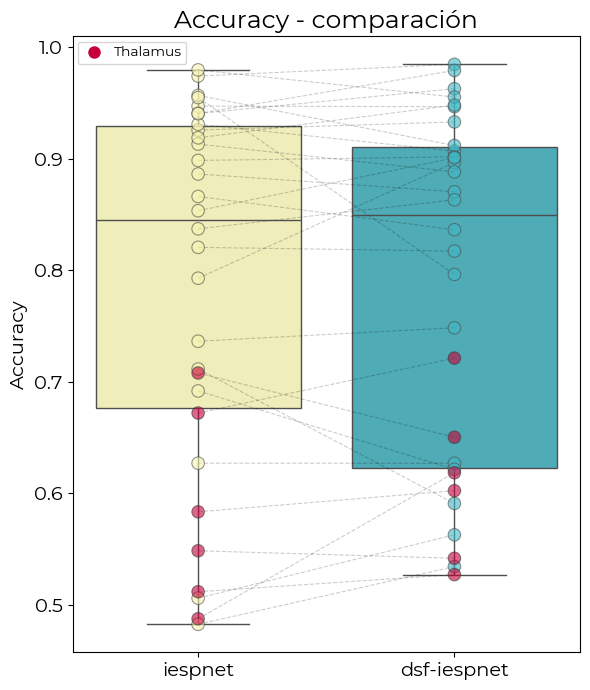

In [22]:
df = pd.DataFrame({'iespnet': accuracy_iespnet, 'dsf-iespnet': accuracy_lopo})

font_path        = '../03-Letra-plot/Montserrat-Regular.ttf'
montserrat       = fm.FontProperties(fname=font_path)

indices_thalamus = [2, 4, 9, 18, 25, 28]
thalamus_data    = df.loc[indices_thalamus]  

plt.figure(figsize = (6, 7), facecolor = 'white')

# Configurar colores personalizados para la cuadrícula
plt.rc('grid', color = '#CFCFCF', linestyle = '--', linewidth = 0.7)
plt.rc('axes', facecolor = 'white')

# Crea el box plot
sns.boxplot(data = df, palette = ["#F8F5B1", "#3EB8C6"])
sns.stripplot(data = df.drop(indices_thalamus), size = 9, jitter = False, linewidth = 0.8, alpha = 0.6, palette = ['#F8F5B1', '#3EB8C6'])
sns.stripplot(data = thalamus_data, size = 9, jitter = False, linewidth = 0.8, alpha = 0.6, palette = ['#C70039', '#C70039'])

#leyenda
thalamus_legend = Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = '#C70039', markersize = 10, label = "Thalamus")
legend = plt.legend(handles=[thalamus_legend], loc='upper left',prop={'size': 8})
for text in legend.get_texts():
    text.set_fontproperties(montserrat)


for i in range(len(accuracy_lopo)):
    plt.plot([0, 1], [accuracy_iespnet[i], accuracy_lopo[i]], linestyle = '--', linewidth = 0.8, alpha = 0.2, color = 'black')

plt.title('Accuracy - comparación', fontproperties = montserrat, fontsize = 18, color = 'black')
plt.ylabel('Accuracy', fontproperties = montserrat, fontsize = 14,color = 'black')


# Aplicar la fuente Montserrat a las etiquetas de los ejes
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=montserrat, fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=montserrat, fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

/tmp/ipykernel_430625/2323479495.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontproperties = montserrat, fontsize = 14)
/tmp/ipykernel_430625/2323479495.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontproperties = montserrat, fontsize = 14)


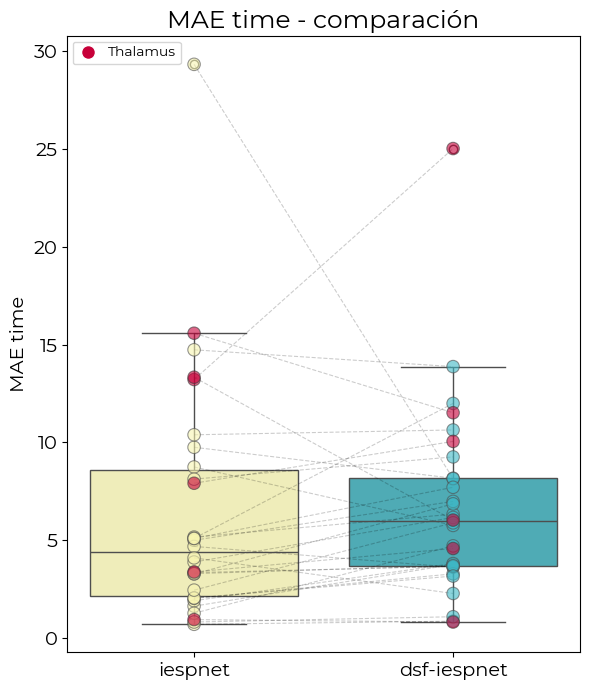

In [21]:
df = pd.DataFrame({'iespnet': MAE_time_iespnet, 'dsf-iespnet': MAE_time_lopo})

font_path        = '../03-Letra-plot/Montserrat-Regular.ttf'
montserrat       = fm.FontProperties(fname=font_path)

indices_thalamus = [2, 4, 9, 18, 25, 28]
thalamus_data    = df.loc[indices_thalamus]  

plt.figure(figsize = (6, 7), facecolor = 'white')

# Configurar colores personalizados para la cuadrícula
plt.rc('grid', color = '#CFCFCF', linestyle = '--', linewidth = 0.7)
plt.rc('axes', facecolor = 'white')

# Crea el box plot
sns.boxplot(data = df, palette = ["#F8F5B1", "#3EB8C6"])
sns.stripplot(data = df.drop(indices_thalamus), size = 9, jitter = False, linewidth = 0.8, alpha = 0.6, palette = ['#F8F5B1', '#3EB8C6'])
sns.stripplot(data = thalamus_data, size = 9, jitter = False, linewidth = 0.8, alpha = 0.6, palette = ['#C70039', '#C70039'])

#leyenda
thalamus_legend = Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = '#C70039', markersize = 10, label = "Thalamus")
legend=plt.legend(handles = [thalamus_legend], loc = 'upper left',prop = {'size': 8})
for text in legend.get_texts():
    text.set_fontproperties(montserrat)


for i in range(len(MAE_time_lopo)):
    plt.plot([0, 1], [MAE_time_iespnet[i], MAE_time_lopo[i]], linestyle='--', linewidth = 0.8, alpha = 0.2, color = 'black')

plt.title('MAE time - comparación', fontproperties = montserrat, fontsize = 18, color = 'black')
plt.ylabel('MAE time', fontproperties = montserrat, fontsize = 14,color = 'black')


# Aplicar la fuente Montserrat a las etiquetas de los ejes
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), fontproperties = montserrat, fontsize = 14)
ax.set_yticklabels(ax.get_yticklabels(), fontproperties = montserrat, fontsize = 14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()